This project use the COVID-19 data downloaded from the Johns Hopkins Coronavirus Resource Center (https://github.com/CSSEGISandData/COVID-19) to:
- Visualize the treand of the COVID-19 deaths across countries.
- Use Norway's data as an example to assess the trend in the data and predict the deaths in Norway.

# 1. Data Preparations

In [1]:
# import the packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [2]:
# read the data
covid_global_death = pd.read_csv("../ml_course_materials/data/time_series_covid19_deaths_global.csv")

# take a look
print(covid_global_death.head())

# check missing values
covid_global_death.isna().sum()

  Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  2/28/23  3/1/23  3/2/23  3/3/23  \
0        0        0        0        0  ...     7896    7896    7896    7896   
1        0        0        0        0  ...     3598    3598    3598    3598   
2        0        0        0        0  ...     6881    6881    6881    6881   
3        0        0        0        0  ...      165     165     165     165   
4        0        0        0        0  ...     1933    1933    1933    1933   

   3/4/23  3/5/23  3/6/23  3/7/23  3/8/23  3/9/23  
0    7896    7896    7896   

Province/State    198
Country/Region      0
Lat                 2
Long                2
1/22/20             0
                 ... 
3/5/23              0
3/6/23              0
3/7/23              0
3/8/23              0
3/9/23              0
Length: 1147, dtype: int64

It seems that there are no missing values on the daily record, but there are a lot of missing on the *Province/State* column. This is probably because this dataset does not contain province-level data for many countries. I decided to remove the *Province/State* column. 

# 2. Explore the Data

In [3]:
# count how many countries
print(f"There are {covid_global_death['Province/State'].nunique()} unique provinces/states.")
print(f"There are {covid_global_death['Country/Region'].nunique()} unique countries/regions.")

# remove the province/state column
covid_global_death.drop('Province/State', axis=1, inplace=True)

# I am not interested in latitude or longitude, so I decided to drop Lat and Long columns
covid_global_death.drop(['Lat', 'Long'], axis=1, inplace=True)

There are 91 unique provinces/states.
There are 201 unique countries/regions.


In addition, we need to convert the format from wide to long.

In [4]:
# Conver the data from a wide to long format
covid_global_death_long = pd.melt(covid_global_death, id_vars='Country/Region', var_name='Date', value_name='death')

In [5]:
# convert the type of the Date column to datetime
covid_global_death_long['Date'] = pd.to_datetime(covid_global_death_long['Date'])

covid_global_death_long.dtypes

/var/folders/2s/75hfppmx6yg_4ms9bqzpxbp40000gp/T/ipykernel_15621/2308169861.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  covid_global_death_long['Date'] = pd.to_datetime(covid_global_death_long['Date'])


Country/Region            object
Date              datetime64[ns]
death                      int64
dtype: object

Because certain countries like China and USA have multiple entries from provinces/states, we need to aggregate them.

In [6]:
# aggregate the number of deaths on Country/Region and Date 
covid_global_death_long_grouped = covid_global_death_long.groupby(['Country/Region', 'Date']).agg({'death': 'sum'}).sort_values(by=['Country/Region', 'Date'])

# check the lengths
print(len(covid_global_death_long), len(covid_global_death_long_grouped))

# reset the index
covid_global_death_long_grouped = covid_global_death_long_grouped.reset_index()

# check the data
covid_global_death_long_grouped

330327 229743


,Country/Region,Date,death
0,Afghanistan,2020-01-22,0
1,Afghanistan,2020-01-23,0
2,Afghanistan,2020-01-24,0
3,Afghanistan,2020-01-25,0
4,Afghanistan,2020-01-26,0
...,...,...,...
229738,Zimbabwe,2023-03-05,5668
229739,Zimbabwe,2023-03-06,5668
229740,Zimbabwe,2023-03-07,5668
229741,Zimbabwe,2023-03-08,5671


In [7]:
# explore the data
print(covid_global_death_long_grouped['death'].describe())

count    2.297430e+05
mean     1.923809e+04
std      7.592769e+04
min      0.000000e+00
25%      4.600000e+01
50%      7.860000e+02
75%      7.227000e+03
max      1.123836e+06
Name: death, dtype: float64


/var/folders/2s/75hfppmx6yg_4ms9bqzpxbp40000gp/T/ipykernel_15621/2986763885.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


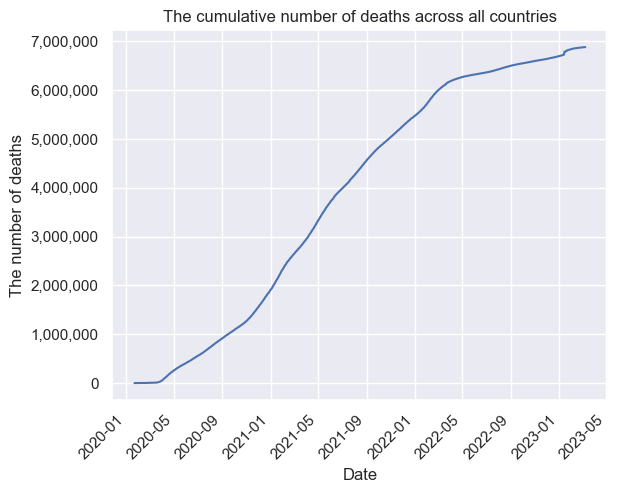

In [23]:
from matplotlib import ticker
fig, ax = plt.subplots()

ax.plot(covid_global_death_long_grouped.groupby('Date').agg({'death': 'sum'}))

ax.set(title="The cumulative number of deaths across all countries",
      xlabel="Date",
      ylabel="The number of deaths")

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

ax.get_yaxis().set_major_formatter(
    ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

Countries with highest death counts: ['US', 'Brazil', 'India', 'Russia', 'Mexico']


/var/folders/2s/75hfppmx6yg_4ms9bqzpxbp40000gp/T/ipykernel_15621/4222886437.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


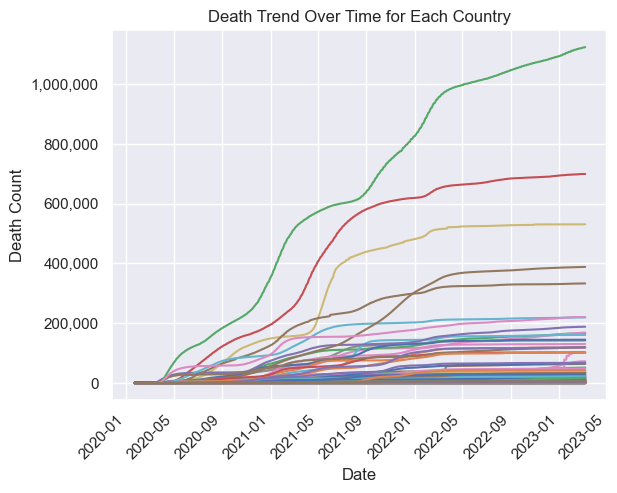

In [9]:
# Filter out countries with zero deaths
filtered_data = covid_global_death_long_grouped.groupby('Country/Region').filter(lambda x: x['death'].iloc[-1] > 0)
top_countries = list(filtered_data.groupby('Country/Region')['death'].last().nlargest(5).index)
print(f"Countries with highest death counts: {top_countries}")

# Create a figure and axis
fig, ax = plt.subplots()

# Iterate over the countries
for country in filtered_data['Country/Region'].unique():
    country_data = filtered_data[filtered_data['Country/Region']==country]
    ax.plot(country_data['Date'], country_data['death'], label=country)


# Add labels
ax.set_xlabel('Date')
ax.set_ylabel('Death Count')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Avoid scientific notation on the y-axis
ax.get_yaxis().set_major_formatter(
    ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

# Add title
ax.set_title('Death Trend Over Time for Each Country')

# Show the plot
plt.show()


# 3. Subset Norway's data as an example

## Prepare the data

In [10]:
# Take a look at Norway's data and start with the date when there is a death record
covid_norway_death = covid_global_death_long_grouped[covid_global_death_long_grouped['Country/Region'] == "Norway"]
covid_norway_death = covid_norway_death.set_index('Date')
covid_norway_death = covid_norway_death.asfreq('D')
covid_norway_death = covid_norway_death['death']
covid_norway_death = covid_norway_death[covid_norway_death>0]

/var/folders/2s/75hfppmx6yg_4ms9bqzpxbp40000gp/T/ipykernel_15621/3942686246.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


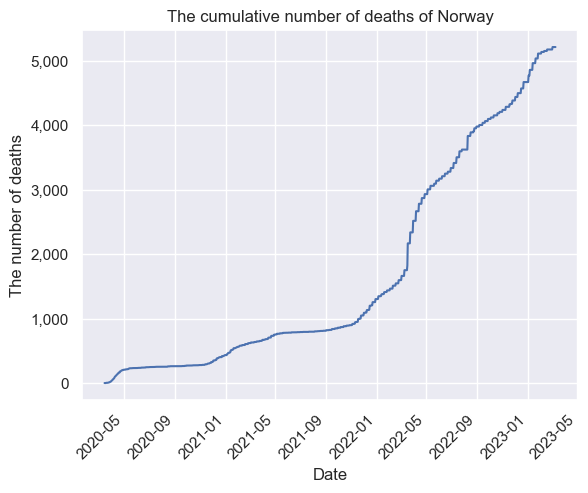

In [24]:
# Plot the trend
fig, ax = plt.subplots()
ax.plot(covid_norway_death)
ax.set(title="The cumulative number of deaths of Norway",
       xlabel="Date", 
       ylabel="The number of deaths")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.get_yaxis().set_major_formatter(
    ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

## Compute weekly records

In [12]:
daily_covid_norway_death = covid_norway_death.diff().dropna()
weekly_covid_norway_death = daily_covid_norway_death.resample('W').sum()
weekly_covid_norway_death

Date
2020-03-15     0.0
2020-03-22     4.0
2020-03-29    18.0
2020-04-05    46.0
2020-04-12    57.0
              ... 
2023-02-12    15.0
2023-02-19    23.0
2023-02-26     0.0
2023-03-05    38.0
2023-03-12     0.0
Freq: W-SUN, Name: death, Length: 157, dtype: float64

## Split training and testing data sets

In [13]:
split_date = '2022-09'
training_data = weekly_covid_norway_death[weekly_covid_norway_death.index < split_date]
testing_data = weekly_covid_norway_death[weekly_covid_norway_death.index >= split_date]

In [14]:
weekly_covid_norway_death[weekly_covid_norway_death.index < '2022-09']

Date
2020-03-15      0.0
2020-03-22      4.0
2020-03-29     18.0
2020-04-05     46.0
2020-04-12     57.0
              ...  
2022-07-31     27.0
2022-08-07      0.0
2022-08-14    211.0
2022-08-21     56.0
2022-08-28     63.0
Freq: W-SUN, Name: death, Length: 129, dtype: float64

Check the rolling mean (moving average) and the standard deviation with window = 5. The purpose is to smooth out short-term fluctuations to highlight the trend of the cycle in the data. 

### Check the trend

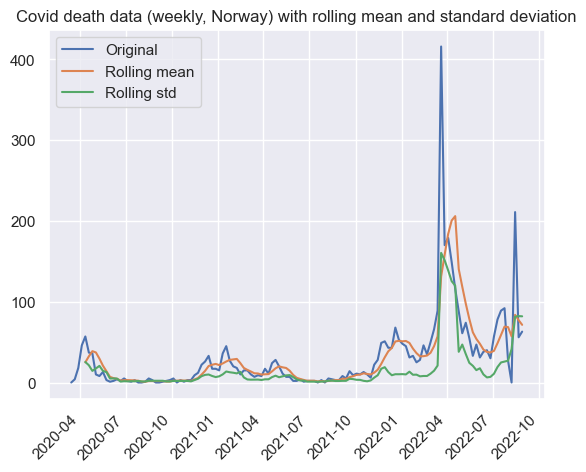

In [15]:
# Plot a look at the rolling mean and standard deviation
rolmean = training_data.rolling(window=5).mean()
rolstd = training_data.rolling(window=5).std()

orig = plt.plot(training_data, label='Original')
mean = plt.plot(rolmean, label='Rolling mean')
std = plt.plot(rolstd, label='Rolling std')

plt.legend(loc='best')
plt.title('Covid death data (weekly, Norway) with rolling mean and standard deviation')
plt.xticks(rotation=45, ha='right')
plt.show()

### Test stationarity
I use the Augmented Dicky-Fuller test to test the stationarity. The null hypothesis is that the data is non-stationary and the alternative one the time series is stationary.

In [16]:
# Import the method
from statsmodels.tsa.stattools import adfuller

# ADF test: p < 0.05, reject the null hypothesis => conclusion: stationary
adtest = adfuller(training_data)
print(f'The test statistic: {adtest[0]}, p-value: {adtest[1]}')

The test statistic: -2.9347856326898323, p-value: 0.041449866452765695


### Autocorrelation function

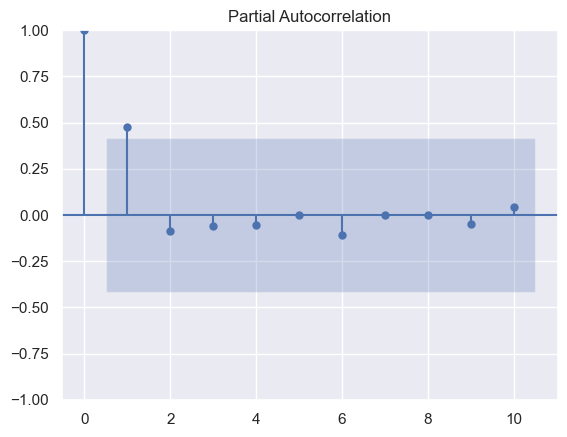

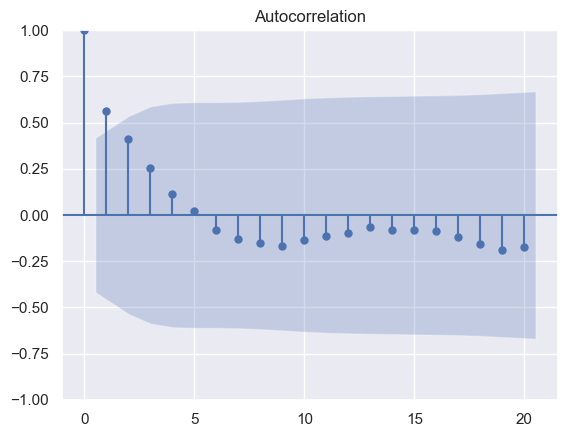

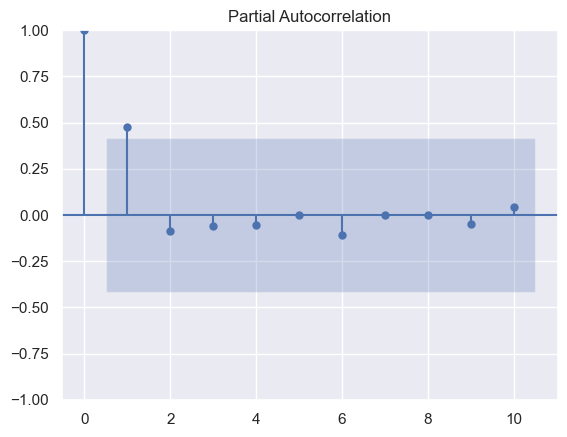

In [17]:
# import module
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

# compute the ACF array and plot it
acf_array = acf(training_data)
plot_acf(acf_array, lags=20, alpha=0.05)

# compute the PACF array and plot it
pacf_array = pacf(training_data)
plot_pacf(pacf_array, lags=10, alpha=0.05)

### Model selection using AIC

In [18]:
# Use Grind Search to find the best model
from statsmodels.tsa.arima.model import ARIMA

best_aic = float('inf')
best_order = None

for p in range(3): 
    for d in range(3):  
        for q in range(3): 
            try:
                model = ARIMA(training_data, order=(p, d, q))
                result = model.fit()
                aic = result.aic
                if aic < best_aic:
                    best_aic = aic
                    best_order = (p, d, q)
            except:
                continue

print(f"Best AIC: {best_aic}, Best Order: {best_order}")

/Users/maoxin/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/maoxin/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Best AIC: 1304.574012762424, Best Order: (2, 1, 1)


In [19]:
# The best model is ARIMA(2,1,1)
best_mod = ARIMA(weekly_covid_norway_death, order=(2,1,1))
best_res = best_mod.fit()
best_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  death   No. Observations:                  157
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -789.428
Date:                Sun, 14 Jan 2024   AIC                           1586.856
Time:                        23:25:43   BIC                           1599.056
Sample:                    03-15-2020   HQIC                          1591.811
                         - 03-12-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3393      0.072      4.740      0.000       0.199       0.480
ar.L2          0.2700      0.096      2.814      0.005       0.082       0.458
ma.L1         -0.9588      0.043    -22.072      0.000      -1.044      -0.874
sigma2      1444.0138     61.194     23.597      0.000    1324.076    1563.952
===================================================================================
Ljung-Box (L1) (Q):                   0.15   Jarque-Bera (JB):             16845.51
Prob(Q):                              0.70   Prob(JB):                         0.00
Heteroskedasticity (H):              41.35   Skew:                             6.01
Prob(H) (two-sided):                  0.00   Kurtosis:                        52.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Assess the model fit

From the analysis below, we can see that all the lags are well within the 95% confidence level. This implies that residuals are random, i.e., white noise, indicating that the model is a good fit..

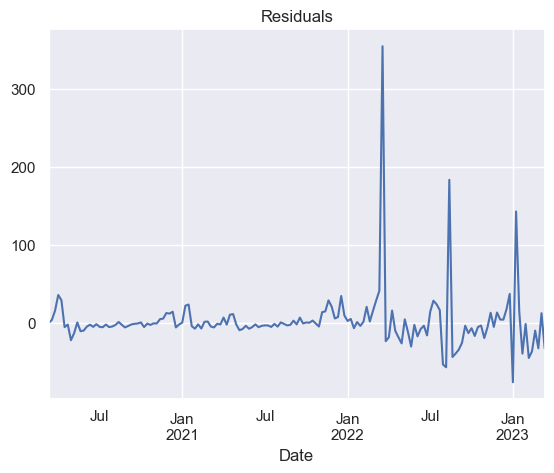

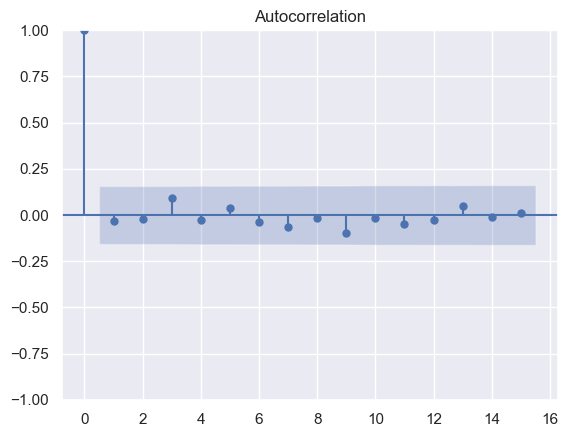

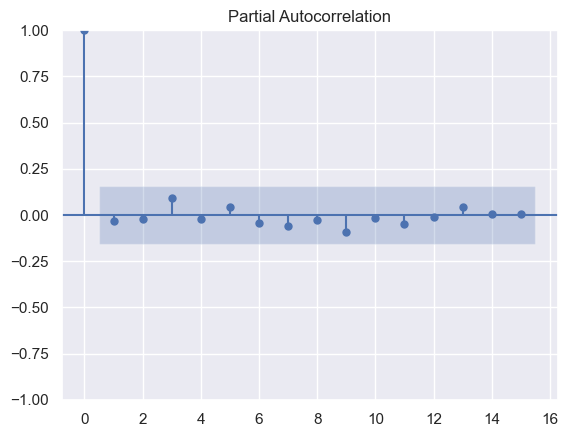

In [20]:
# Check the residuals
residuals = best_res.resid
residuals.plot(title='Residuals')
plt.show()

plot_acf(residuals, lags=15)
plot_pacf(residuals, lags=15)
plt.show()

Compare the predictions and real data

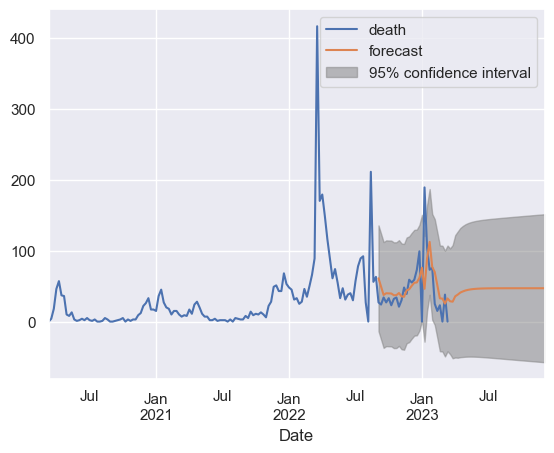

In [21]:
from statsmodels.graphics.tsaplots import plot_predict

fig, ax = plt.subplots()
weekly_covid_norway_death.plot(ax=ax)
plot_predict(best_res, start='2022-09', 
             end='2023-12', alpha=0.05, ax=ax) # start and end can be the row number as well
plt.show()

Compute MSE and MAE

In [22]:
predictions = best_res.predict(start='2022-09', end='2023-03')

from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(testing_data, predictions)
mae = mean_absolute_error(testing_data, predictions)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')

print(f'The average number of real observations per week: {np.mean(testing_data)},\nThe average number of predictions per week: {np.mean(predictions)}')

Mean Squared Error: 1373.3092548957345
Mean Absolute Error: 23.915770716196864
The average number of real observations per week: 45.0,
The average number of predictions per week: 50.30978169368488


# 4. Conclusion

This project used the weekly death counts of COVID-19 in Norway from 2020-03 to 2023-03 and applied the ARIMA model to the data. Through a model comparison approach, ARIMA(2,1,1) fit best with the data. I split the data into training and testing data sets with the cutoff date (2022-09), and the predictions based on the training data are relatively close to the real observations in the testing data. The average number of the real observations in the testing data is 45 cases per week, and the predicted average cases was 50 per week. 